<h4 align="right">24th of February 2020</h4>
<h1 align="center">Neural Networks and Deep Learning (CIE 555)</h1>
<h2 align="center">Lab 5: Regularization</h2> <br>

### Manual implementation of L2 and Dropout

In [1]:
!git clone https://github.com/andersy005/deep-learning-specialization-coursera.git

Cloning into 'deep-learning-specialization-coursera'...
remote: Enumerating objects: 459, done.
remote: Total 459 (delta 0), reused 0 (delta 0), pack-reused 459
Receiving objects: 100% (459/459), 41.36 MiB | 7.23 MiB/s, done.
Resolving deltas: 100% (156/156), done.


In [2]:
% cd deep-learning-specialization-coursera/02-Improving-Deep-Neural-Networks/week3/Programming-Assignments

/content/deep-learning-specialization-coursera/02-Improving-Deep-Neural-Networks/week3/Programming-Assignments


In [3]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

In [0]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((train_set_y_orig.shape[0], 1))
    test_set_y_orig = test_set_y_orig.reshape((test_set_y_orig.shape[0], 1))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation, :]
    shuffled_Y = Y[permutation, :].reshape((m, Y.shape[1]))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size, :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size, :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m, :]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m, :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

def forward_propagation(X, parameters, keep_prob):
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
                                                           
    Z1 = tf.add(tf.matmul(X, W1), b1)                      
    A1 = tf.nn.relu(Z1)   

    ### adding dropout layer ##
    ## NOTE: In tensorflow v2 use rate instead of keep_prob. Rate should be set to rate = 1 - keep_prob ##

    A1 = tf.nn.dropout(A1,keep_prob=keep_prob)
  
    Z2 = tf.add(tf.matmul(A1, W2), b2)                     
    A2 = tf.nn.relu(Z2)     

    ### adding dropout layer ##
    ## NOTE: In tensorflow v2 use rate instead of keep_prob. Rate should be set to rate = 1 - keep_prob ##
    
    A2 = tf.nn.dropout(A2,keep_prob=keep_prob)
    
    Z3 = tf.add(tf.matmul(A2, W3), b3)                    
    
    return Z3
  
def create_placeholders(n_x, n_y):

    X = tf.placeholder(tf.float32, [None, n_x], name="X")
    Y = tf.placeholder(tf.float32, [None, n_y], name="Y")
    
    return X, Y
  
def initialize_parameters():
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    W1 = tf.get_variable("W1", [64*64*3, 25], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1", [1, 25], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [25, 12], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [1, 12], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [12, 6], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [1, 6], initializer = tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

# Unless specified by the user, lambd = zero means no regularization happens.
def compute_cost(Z3, Y, parameters, Xtrainrows, lambd=0):
 
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = Z3
    labels = Y
    
    
    m = Xtrainrows
    # remove the weights
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    ########### Adding L2 Regularization norm ############ 
    L2_regularization_cost = lambd *(tf.reduce_sum(tf.square(W1)) + tf.reduce_sum(tf.square(W2)) + tf.reduce_sum(tf.square(W3)))/(2*m)


    cross_cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    # adjust cost tensor
    cost = cross_cost + L2_regularization_cost
    
    return cost

In [0]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

In [0]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1)
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1)

In [7]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1)
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1)
# Normalize image vectors
X_train = X_train_flatten / 255.
X_test = X_test_flatten / 255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print("number of training examples = " + str(X_train.shape[0]))
print("number of test examples = " + str(X_test.shape[0]))
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 12288)
Y_train shape: (1080, 6)
X_test shape: (120, 12288)
Y_test shape: (120, 6)


In [0]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001, L2_lambda = 0, dropout_keep = 1,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
 
    ops.reset_default_graph()                         
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (m, n_x) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[1]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)

    # Initialize parameters
    parameters = initialize_parameters()
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z3 = forward_propagation(X, parameters, keep_prob=dropout_keep)
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z3, Y, parameters, X_train.shape[0], lambd=L2_lambda)
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feed_dict should contain a minibatch for (X,Y).
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
    
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3,1), tf.argmax(Y,1))

        # Calculate accuracy on both train and test sets
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train})*100,'%')
        print("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test})*100,'%')
        
        return parameters

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Cost after epoch 0: 1.850996
Cost after epoch 100: 1.077817
Cost after epoch 200: 0.903712
Cost after epoch 300: 0.783802
Cost after epoch 400: 0.691234
Cost after epoch 500: 0.621478
Cost after epoch 600: 0.555807
Cost after epoch 700: 0.509645
Cost after epoch 800: 0.458705
Cost after epoch 900: 0.413150
Cost after epoch 1000:

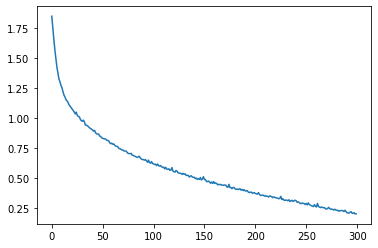

Train Accuracy: 93.88889074325562 %
Test Accuracy: 75.0 %


In [9]:
parameters = model(X_train, Y_train, X_test, Y_test) # without anything 

There is a clear overfitting

Cost after epoch 0: 1.851370
Cost after epoch 100: 1.078108
Cost after epoch 200: 0.904031
Cost after epoch 300: 0.784112
Cost after epoch 400: 0.684790
Cost after epoch 500: 0.612137
Cost after epoch 600: 0.544065
Cost after epoch 700: 0.495880
Cost after epoch 800: 0.441071
Cost after epoch 900: 0.395628
Cost after epoch 1000: 0.350769
Cost after epoch 1100: 0.313747
Cost after epoch 1200: 0.275466
Cost after epoch 1300: 0.225654
Cost after epoch 1400: 0.190940


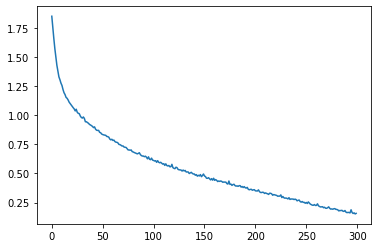

Train Accuracy: 95.83333134651184 %
Test Accuracy: 76.66666507720947 %


In [10]:
parameters = model(X_train, Y_train, X_test, Y_test, L2_lambda = 0.01) #with L2 regularization (weight=0.01) 

Cost after epoch 0: 1.851267
Cost after epoch 100: 1.078085
Cost after epoch 200: 0.903769
Cost after epoch 300: 0.783990
Cost after epoch 400: 0.686785
Cost after epoch 500: 0.613606
Cost after epoch 600: 0.545497
Cost after epoch 700: 0.497449
Cost after epoch 800: 0.443001
Cost after epoch 900: 0.396848
Cost after epoch 1000: 0.350983
Cost after epoch 1100: 0.315373
Cost after epoch 1200: 0.279943
Cost after epoch 1300: 0.228252
Cost after epoch 1400: 0.193063


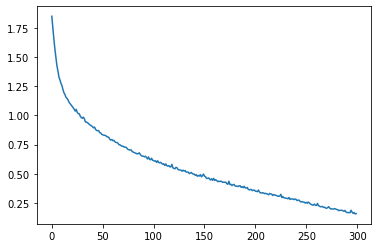

Train Accuracy: 95.92592716217041 %
Test Accuracy: 75.0 %


In [11]:
parameters = model(X_train, Y_train, X_test, Y_test, L2_lambda = 0.007) #with L2 regularization (weight=0.007) 

Better regularization using Dropout and L2:

Cost after epoch 0: 1.847498
Cost after epoch 100: 1.074881
Cost after epoch 200: 0.839804
Cost after epoch 300: 0.730881
Cost after epoch 400: 0.645614
Cost after epoch 500: 0.565241
Cost after epoch 600: 0.500043
Cost after epoch 700: 0.454771
Cost after epoch 800: 0.457167
Cost after epoch 900: 0.385917
Cost after epoch 1000: 0.397937
Cost after epoch 1100: 0.351194
Cost after epoch 1200: 0.312395
Cost after epoch 1300: 0.281201
Cost after epoch 1400: 0.290899


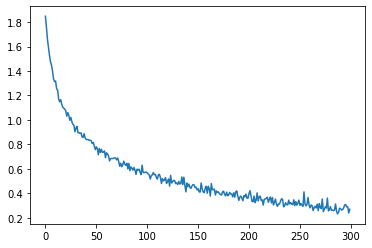

Train Accuracy: 92.96296238899231 %
Test Accuracy: 80.83333373069763 %


In [12]:
parameters = model(X_train, Y_train, X_test, Y_test, dropout_keep = 0.95, L2_lambda = 0.01) #with L2 regularization and Dropout

# Practice

## Task
1) build keras model with the following specs and use it to test regularization

specs: 
* 2 hidden layers each with 500 neurons with RELU activation
* output layer with 10 neurons and softmax activation
* optimizer: SGD with LR = 0.01
* Loss: ctegorical_crossentropy
* epochs = 1000
* batch_size = 512
* validation_split = 0.2

2) build 4 models: one with no regularization, and for the other three use L2, Dropout, early stopping respectively.

3) use plot_history() function for each model to plot the training and validation loss curves and observe overfitting.

4) report difference between train and val accuracy for each model.


#### data import

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

In [0]:
mnist = tf.keras.datasets.mnist.load_data()

In [24]:
train, test = mnist
all_xtrain, all_Ytrain = train
all_xtest, all_Ytest = test
xtrain = all_xtrain[:5000]
Ytrain = all_Ytrain[:5000]
xtrain = xtrain.reshape(-1,28*28) / 255
print(xtrain.shape)
xtest = all_xtest[:1000]
Ytest = all_Ytest[:1000]
xtest = xtest.reshape(-1,28*28) / 255
print(xtest.shape)


(5000, 784)
(1000, 784)


In [0]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse = False,categories='auto')
ytrain = enc.fit_transform(Ytrain.reshape(-1, 1))
ytest = enc.transform(Ytest.reshape(-1, 1))

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

Train on 4000 samples, validate on 1000 samples
Epoch 1/1000
4000/4000 [==============================] - 0s 106us/sample - loss: 2.2998 - acc: 0.1262 - val_loss: 2.2697 - val_acc: 0.1350
Epoch 2/1000
4000/4000 [==============================] - 0s 85us/sample - loss: 2.2369 - acc: 0.1815 - val_loss: 2.2103 - val_acc: 0.2050
Epoch 3/1000
4000/4000 [==============================] - 0s 81us/sample - loss: 2.1780 - acc: 0.2862 - val_loss: 2.1537 - val_acc: 0.3130
Epoch 4/1000
4000/4000 [==============================] - 0s 83us/sample - loss: 2.1215 - acc: 0.3865 - val_loss: 2.0984 - val_acc: 0.4110
Epoch 5/1000
4000/4000 [==============================] - 0s 84us/sample - loss: 2.0659 - acc: 0.4680 - val_loss: 2.0435 - val_acc: 0.4780
Epoch 6/1000
4000/4000 [==============================] - 0s 86us/sample - loss: 2.0106 - acc: 0.5343 - val_loss: 1.9885 - val_acc: 0.5330
Epoch 7/1000
4000/4000 [==============================] - 0s 82us/sample - loss: 1.9548 - acc: 0.5915 - val_loss: 1.9

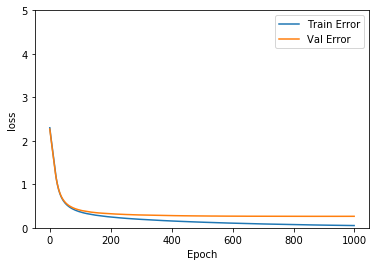

In [28]:
############### No regulization #####################
inp = layers.Input(shape=(xtrain.shape[1],))
x = layers.Dense(500, activation =tf.nn.relu)(inp)
x = layers.Dense(500, activation =tf.nn.relu)(x)
out = layers.Dense(10, activation=tf.nn.softmax)(x)
model = keras.Model(inp,out)

#optimizer
optimizer = tf.keras.optimizers.SGD(0.01)

# training the model
epochs = 1000 

model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['acc'])

history = model.fit(xtrain, ytrain, batch_size = 512, epochs = epochs, validation_split = 0.2, verbose = True)

train_acc = model.evaluate(xtrain, ytrain, verbose=0)[1]
test_acc = model.evaluate(xtest, ytest, verbose=0)[1]
print('Train_accuracy: %.2f, Test_accuracy: %.2f' % (train_acc, test_acc))
plot_history(history)


Using TensorFlow backend.


Train on 4000 samples, validate on 1000 samples
Epoch 1/1000
4000/4000 [==============================] - 0s 123us/sample - loss: 13.5747 - acc: 0.0845 - val_loss: 13.5173 - val_acc: 0.0910
Epoch 2/1000
4000/4000 [==============================] - 0s 87us/sample - loss: 13.4807 - acc: 0.1187 - val_loss: 13.4266 - val_acc: 0.1650
Epoch 3/1000
4000/4000 [==============================] - 0s 85us/sample - loss: 13.3907 - acc: 0.2305 - val_loss: 13.3387 - val_acc: 0.3220
Epoch 4/1000
4000/4000 [==============================] - 0s 85us/sample - loss: 13.3031 - acc: 0.3683 - val_loss: 13.2524 - val_acc: 0.4520
Epoch 5/1000
4000/4000 [==============================] - 0s 86us/sample - loss: 13.2165 - acc: 0.4760 - val_loss: 13.1668 - val_acc: 0.5380
Epoch 6/1000
4000/4000 [==============================] - 0s 85us/sample - loss: 13.1307 - acc: 0.5472 - val_loss: 13.0818 - val_acc: 0.5980
Epoch 7/1000
4000/4000 [==============================] - 0s 85us/sample - loss: 13.0452 - acc: 0.6053 - 

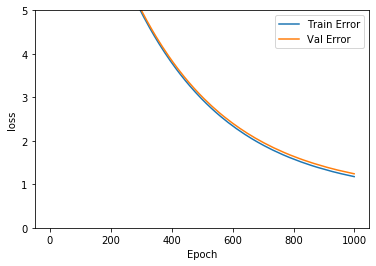

In [29]:
############### L2 regulization #####################
from keras import regularizers

inp = layers.Input(shape=(xtrain.shape[1],))
x = layers.Dense(500, activation =tf.nn.relu, kernel_regularizer=regularizers.l2(0.01))(inp) #
x = layers.Dense(500, activation =tf.nn.relu, kernel_regularizer=regularizers.l2(0.01))(x)
out = layers.Dense(10, activation=tf.nn.softmax, kernel_regularizer=regularizers.l2(0.01))(x)
model = keras.Model(inp,out)

#optimizer
optimizer = tf.keras.optimizers.SGD(0.01)

# training the model
epochs = 1000 

model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['acc'])

history = model.fit(xtrain, ytrain, batch_size = 512, epochs = epochs, validation_split = 0.2, verbose = True)

train_acc = model.evaluate(xtrain, ytrain, verbose=0)[1]
test_acc = model.evaluate(xtest, ytest, verbose=0)[1]
print('Train_accuracy: %.2f, Test_accuracy: %.2f' % (train_acc, test_acc))
plot_history(history)

Train on 4000 samples, validate on 1000 samples
Epoch 1/1000
4000/4000 [==============================] - 1s 136us/sample - loss: 2.3154 - acc: 0.1380 - val_loss: 2.2755 - val_acc: 0.1780
Epoch 2/1000
4000/4000 [==============================] - 0s 84us/sample - loss: 2.2399 - acc: 0.2208 - val_loss: 2.2052 - val_acc: 0.2650
Epoch 3/1000
4000/4000 [==============================] - 0s 82us/sample - loss: 2.1710 - acc: 0.3047 - val_loss: 2.1400 - val_acc: 0.3490
Epoch 4/1000
4000/4000 [==============================] - 0s 84us/sample - loss: 2.1061 - acc: 0.3988 - val_loss: 2.0774 - val_acc: 0.4130
Epoch 5/1000
4000/4000 [==============================] - 0s 82us/sample - loss: 2.0432 - acc: 0.4680 - val_loss: 2.0165 - val_acc: 0.4910
Epoch 6/1000
4000/4000 [==============================] - 0s 82us/sample - loss: 1.9813 - acc: 0.5272 - val_loss: 1.9561 - val_acc: 0.5600
Epoch 7/1000
4000/4000 [==============================] - 0s 85us/sample - loss: 1.9201 - acc: 0.5867 - val_loss: 1.8

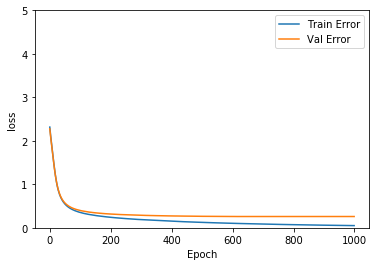

In [35]:
############### Dropout #####################
rate = 0.3

inp = layers.Input(shape=(xtrain.shape[1],))
x = layers.Dense(500, activation =tf.nn.relu)(inp)
tf.keras.layers.Dropout(rate, noise_shape=None, seed=None)
x = layers.Dense(500, activation =tf.nn.relu)(x)
tf.keras.layers.Dropout(rate, noise_shape=None, seed=None)
out = layers.Dense(10, activation=tf.nn.softmax)(x)
model = keras.Model(inp,out)

#optimizer
optimizer = tf.keras.optimizers.SGD(0.01)

# training the model
epochs = 1000 

model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['acc'])

history = model.fit(xtrain, ytrain, batch_size = 512, epochs = epochs, validation_split = 0.2, verbose = True)

train_acc = model.evaluate(xtrain, ytrain, verbose=0)[1]
test_acc = model.evaluate(xtest, ytest, verbose=0)[1]
print('Train_accuracy: %.2f, Test_accuracy: %.2f' % (train_acc, test_acc))
plot_history(history)

Train on 4000 samples, validate on 1000 samples
Epoch 1/1000
4000/4000 [==============================] - 1s 141us/sample - loss: 2.2819 - acc: 0.1437 - val_loss: 2.2408 - val_acc: 0.2000
Epoch 2/1000
4000/4000 [==============================] - 0s 86us/sample - loss: 2.2185 - acc: 0.2520 - val_loss: 2.1817 - val_acc: 0.3170
Epoch 3/1000
4000/4000 [==============================] - 0s 81us/sample - loss: 2.1588 - acc: 0.3610 - val_loss: 2.1249 - val_acc: 0.4070
Epoch 4/1000
4000/4000 [==============================] - 0s 82us/sample - loss: 2.1010 - acc: 0.4610 - val_loss: 2.0691 - val_acc: 0.4920
Epoch 5/1000
4000/4000 [==============================] - 0s 82us/sample - loss: 2.0439 - acc: 0.5297 - val_loss: 2.0135 - val_acc: 0.5450
Epoch 6/1000
4000/4000 [==============================] - 0s 83us/sample - loss: 1.9869 - acc: 0.5795 - val_loss: 1.9577 - val_acc: 0.5890
Epoch 7/1000
4000/4000 [==============================] - 0s 81us/sample - loss: 1.9297 - acc: 0.6205 - val_loss: 1.9

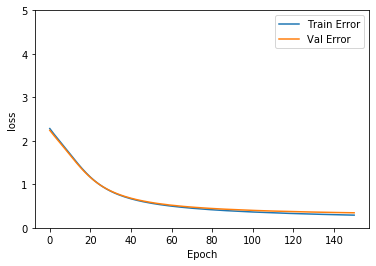

In [37]:
############### Early stopping #####################
from keras.callbacks import EarlyStopping


inp = layers.Input(shape=(xtrain.shape[1],))
x = layers.Dense(500, activation =tf.nn.relu)(inp)
x = layers.Dense(500, activation =tf.nn.relu)(x)
out = layers.Dense(10, activation=tf.nn.softmax)(x)
model = keras.Model(inp,out)

#optimizer
optimizer = tf.keras.optimizers.SGD(0.01)

# training the model
epochs = 1000 

model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['acc'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model.fit(xtrain, ytrain, batch_size = 512, epochs = epochs, validation_split = 0.2, verbose = True, callbacks=[es])

train_acc = model.evaluate(xtrain, ytrain, verbose=0)[1]
test_acc = model.evaluate(xtest, ytest, verbose=0)[1]
print('Train_accuracy: %.2f, Test_accuracy: %.2f' % (train_acc, test_acc))
plot_history(history)

In [0]:
## Without Regulization Difference = 0.98   - 0.9280 = 0.052
## L2 Difference                   = 0.93   - 0.9110 = 0.0190
## Droupout Difference             = 0.98   - 0.9340 = 0.0460
## Early stopping Difference       = 0.92   - 0.8950 = 0.0250
## L2 is the best, then Early stopping , then Dropout, then With no Regulization 

## Data Augmentation

If we want to apply data augmentation on the input image data to increase the size of the training data before feeding them to the network, we use keras.preprocessing.image.ImageDataGenerator()

Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).

https://keras.io/preprocessing/image/

In [39]:
epochs = 10
batch_Size = 512

datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(all_xtrain[:5000])

## training the model using the generated augmented data
model.fit_generator(datagen.flow(all_xtrain[:5000], ytrain[:5000], batch_size=batch_Size),
                    steps_per_epoch=5000 / batch_Size, epochs=epochs)

ValueError: ignored